In [3]:
import numpy as np  # whole numpy lib is available, prepend 'np.'
import mne
import os  # handy system and path function
import matplotlib.pyplot as plt
import pandas as pd 
import ast
#print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Pandas version 0.23.4


# enforced_fix_subs=['243','249','254','257','248','264','258']
# Separating subjects into cue users and white bears

In [4]:
ROOT_preproc='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/'

exclude_subs=['224','214','243','247','226','252','234','228','237']
whiteBears_SOAcomp=[]
whiteBears_CvNcomp=[]
cueUsers_target_SOAcomp=[]
cueUsers_target_CvNcomp=[]
cueUsers_dis_SOAcomp=[]
cueUsers_dis_CvNcomp=[]
preproc_cue_eps={}
#preproc_probe_eps={}
for s in os.listdir(ROOT_preproc):
    if s not in exclude_subs:
        cue=mne.read_epochs(ROOT_preproc+s+'/'+'cue_enforcedFix-epo.fif')
        print(s)
        df=cue.metadata

        allTar_shortSOA_RTs= np.mean(df[df['trial_type']=='tar'][df['SOA']=="short"].RT)
        allTar_longSOA_RTs= np.mean(df[df['trial_type']=='tar'][df['SOA']=="long"].RT)
        allDis_shortSOA_RTs= np.mean(df[df['trial_type']=='dis'][df['SOA']=="short"].RT)
        allDis_longSOA_RTs= np.mean(df[df['trial_type']=='dis'][df['SOA']=="long"].RT)
        allNeut_shortSOA_RTs= np.mean(df[df['trial_type']=='neut'][df['SOA']=="short"].RT)
        allNeut_longSOA_RTs= np.mean(df[df['trial_type']=='neut'][df['SOA']=="long"].RT)
        print('TS: '+str(allTar_shortSOA_RTs))
        print("TL: "+str(allTar_longSOA_RTs))
        print('DS: '+str(allDis_shortSOA_RTs))
        print('DL: '+str(allDis_longSOA_RTs))
        print('NS: '+str(allNeut_shortSOA_RTs))
        print('NL: '+str(allNeut_longSOA_RTs))
        #allSpatial_disPres_RTs=np.mean(df[df['trial_type']=='dis'].RT)
        #allNeutral_disPres_RTs= np.mean(df[df['trial_type']=='neut'][df['dis_PresentorAbsent']=="Present"].RT)
        #allNeutral_disAbs_RTs= np.mean(df[df['trial_type']=='neut'][df['dis_PresentorAbsent']=="Absent"].RT)
        
        tarCueScore_SOA= ((allTar_longSOA_RTs-allTar_shortSOA_RTs)/(allTar_longSOA_RTs+allTar_shortSOA_RTs))
        tarCueScore_CvN= ((allTar_longSOA_RTs-allNeut_longSOA_RTs)/(allTar_longSOA_RTs+allNeut_longSOA_RTs))
        disCueScore_SOA= ((allDis_longSOA_RTs-allDis_shortSOA_RTs)/(allDis_longSOA_RTs+allDis_shortSOA_RTs))
        disCueScore_CvN= ((allDis_longSOA_RTs-allNeut_longSOA_RTs)/(allDis_longSOA_RTs+allNeut_longSOA_RTs))
        neutCueScore= ((allNeut_longSOA_RTs-allNeut_shortSOA_RTs)/(allNeut_longSOA_RTs+allNeut_shortSOA_RTs))
        
        #spatCueScore=((allSpatial_disPres_RTs-allNeutral_disAbs_RTs)/(allSpatial_disPres_RTs+allNeutral_disAbs_RTs))
        #neutCueScore=((allNeutral_disPres_RTs-allNeutral_disAbs_RTs)/(allNeutral_disPres_RTs+allNeutral_disAbs_RTs))
        
        allScores=[neutCueScore,tarCueScore_SOA,tarCueScore_CvN,disCueScore_SOA, disCueScore_CvN]
        print("neutCueScore: "+str(neutCueScore))
        print("tarCueScore_SOA: "+str(tarCueScore_SOA))
        print('tarCueScore_CvN: '+str(tarCueScore_CvN))
        print('disCueScore_SOA: '+str(disCueScore_SOA))
        print('disCueScore_CvN: '+str(disCueScore_CvN))
        assert len(np.unique(allScores)) == len(allScores)
            #print("NOT ALL SCORES ARE UNQIUE!")
            
        smallestScore_SOAcomps=np.min([neutCueScore,tarCueScore_SOA,disCueScore_SOA])
        smallestScore_CvNcomps=np.min([neutCueScore,tarCueScore_CvN,disCueScore_CvN])
        
        if smallestScore_SOAcomps==neutCueScore: 
            # ie, if RT is fastest for our neutral Score, then this sub is a white Bear
                   #spatCueScore > neutCueScore:
            whiteBears_SOAcomp.append(s)      
        elif smallestScore_SOAcomps==tarCueScore_SOA:
                #neutCueScore > spatCueScore:
            cueUsers_target_SOAcomp.append(s)    
        elif smallestScore_SOAcomps==disCueScore_SOA:
            cueUsers_dis_SOAcomp.append(s)
        else:
            print('\n\n error!!!!!!!!!!!!!!!!!!!!!\n\n')
            
        if smallestScore_CvNcomps==neutCueScore:
            whiteBears_CvNcomp.append(s)
        elif smallestScore_CvNcomps==tarCueScore_CvN:
            cueUsers_target_CvNcomp.append(s)           
        elif smallestScore_CvNcomps==disCueScore_CvN:
            cueUsers_dis_CvNcomp.append(s)
            
        else:
            print("\n\n errrrrrror!!!!!!!!!!!!!!!!!!\n\n")
            
        preproc_cue_eps[s]=cue

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/253/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
598 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated
253
TS: 1.1063336695619563
TL: 1.0805803825595959
DS: 1.1915786652866662
DL: 1.1410288679521285
NS: 1.1282724226263159
NL: 1.0882733101387756
neutCueScore: -0.018045696913116378
tarCueScore_SOA: -0.011776085565583558
tarCueScore_CvN: -0.0035470016281313067
disCueScore_SOA: -0.021670939759141545
disCueScore_CvN: 0.023664606051087674
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/254/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


553 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated
254
TS: 0.8888797068233334
TL: 0.6971872250453488
DS: 0.901595161364935
DL: 0.8335676899022475
NS: 0.7169067877929413
NL: 0.6794776271765434
neutCueScore: -0.026804338558315863
tarCueScore_SOA: -0.12086027261922368
tarCueScore_CvN: 0.012864131629584882
disCueScore_SOA: -0.039205237371816325
disCueScore_CvN: 0.10184100964219832
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/257/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
542 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
0 projection items activated
257
TS: 0.6819992320174418
TL: 0.5442721757525772
DS: 0.6858548325872093
DL: 0.5309631103530612
NS: 1.2193584050599997
NL: 1.2223538574581394
neutCueSc

    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
452 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 37 columns
0 projection items activated
241
TS: 0.9962712734119401
TL: 1.0561323655638557
DS: 1.0854596617806456
DL: 1.0428710641824326
NS: 0.9849698739109589
NL: 0.968882552469231
neutCueScore: -0.008233642021537974
tarCueScore_SOA: 0.02916633503036853
tarCueScore_CvN: 0.04308601004251915
disCueScore_SOA: -0.02001032878898155
disCueScore_CvN: 0.03677811790707604
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad_removingNonFixationTrials/233/cue_enforcedFix-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
549 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 37 columns
0 projection items activated
233
TS: 0.6887882256945055
TL: 0.58

In [6]:
print(cueUsers_dis_CvNcomp)
print(cueUsers_target_CvNcomp)
print(whiteBears_CvNcomp)
print('\n\n')
print(cueUsers_dis_SOAcomp)
print(cueUsers_target_SOAcomp)
print(whiteBears_SOAcomp)

['257']
['258', '248', '255', '211', '206', '244', '225', '249', '231', '251', '233', '240', '223', '264']
['253', '254', '241', '197']



['253', '257', '255', '241', '240', '197']
['254', '258', '248', '211', '206', '244', '225', '249', '231', '251', '233', '223', '264']
[]


# Separating circle positions

In [8]:
right_stim=['1','3','5']
center_stim=['6','12']
left_stim=['7','9','11']

conditions=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']#,'neutShortCue_trig','neutLongCue_trig']
preprocCues_LeftH={}
preprocCues_RightH={}
preprocCues_Neutrals={}

for sub in preproc_cue_eps.keys():
    
    preprocCues_LeftH[sub]={}
    preprocCues_RightH[sub]={}
    preprocCues_Neutrals[sub]={}
    
    # load cue_epochs for this sub
    cue_eps=preproc_cue_eps[sub]
    
    # loop thru conditions
    for cond in conditions:
        epsForThisCond=cue_eps[cond]
                    
        # set up empty lists to be populated with trials that are NOT L/R/center
        not_right=[]
        not_left=[]
        # will populate w bools where True== drop this trial

        # loop thru each trial, and check out the metadata
        for trial_n in range(len(epsForThisCond)):
            this_trial=epsForThisCond[trial_n]

            assert this_trial.metadata['trial_type'].iloc[0] in cond            
            # grab out the behav data of this trial
            this_trial_StimLoc=this_trial.metadata['tar,dis stim_loc'].iloc[0]
            this_trial_StimLoc=ast.literal_eval(this_trial_StimLoc) # turn it into a literal tuple

            # identify the condition of interest and pull out that stim loc
            if 'tar' in cond:
                thisClockPos=this_trial_StimLoc[0] 
                # if its the target that was the color singleton, we care about which
                                        # hemisphere that was in
            elif 'dis' in cond:
                thisClockPos=this_trial_StimLoc[1]

            # if the the clock pos is on the right side of the screen, 
                # then we want to document as not-not right, not left, and not center
            if thisClockPos in right_stim:
                not_right.append(False)
                not_left.append(True)
            elif thisClockPos in left_stim:
                not_right.append(True)
                not_left.append(False)
            else:
                not_right.append(True)
                not_left.append(True)

        print(len(not_right),len(not_left),len(epsForThisCond))
        assert len(not_right) == len(not_left) == len(epsForThisCond)

        # make three copies of the original epochs for this condition
        all_Rights=epsForThisCond.copy()
        all_Lefts=epsForThisCond.copy()

        # then drop all of the epochs that are "True" in not being on the side of the screen we want
        all_Rights.drop(indices=np.asarray(not_right),reason='Dropping all left and centers')
        all_Lefts.drop(indices=np.asarray(not_left),reason='Dropping all right and centers')



        # now put it into a dict
        preprocCues_LeftH[sub][cond]=all_Lefts
        preprocCues_RightH[sub][cond]=all_Rights
        
        

99 99 99
Dropped 68 epochs
Dropped 63 epochs
99 99 99
Dropped 61 epochs
Dropped 61 epochs
100 100 100
Dropped 62 epochs
Dropped 65 epochs
100 100 100
Dropped 64 epochs
Dropped 66 epochs
94 94 94
Dropped 59 epochs
Dropped 64 epochs
87 87 87
Dropped 56 epochs
Dropped 55 epochs
91 91 91
Dropped 62 epochs
Dropped 51 epochs
95 95 95
Dropped 54 epochs
Dropped 65 epochs
86 86 86
Dropped 50 epochs
Dropped 53 epochs
87 87 87
Dropped 49 epochs
Dropped 61 epochs
97 97 97
Dropped 60 epochs
Dropped 65 epochs
98 98 98
Dropped 65 epochs
Dropped 62 epochs
82 82 82
Dropped 51 epochs
Dropped 57 epochs
84 84 84
Dropped 51 epochs
Dropped 55 epochs
89 89 89
Dropped 54 epochs
Dropped 58 epochs
90 90 90
Dropped 61 epochs
Dropped 58 epochs
83 83 83
Dropped 53 epochs
Dropped 53 epochs
91 91 91
Dropped 57 epochs
Dropped 60 epochs
83 83 83
Dropped 59 epochs
Dropped 52 epochs
85 85 85
Dropped 44 epochs
Dropped 61 epochs
79 79 79
Dropped 49 epochs
Dropped 50 epochs
80 80 80
Dropped 50 epochs
Dropped 52 epochs
78 7

# Plotting Topomaps Seperated by White Bear v Cue users (Cue - Neutral cue users)


### Group avg for white bear users

In [11]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.
leftPost_elecs=['CP5','CP3','P7','P5','P3','PO3','PO7']
rightPost_elecs=['CP4','CP6','P4','P6','P8','PO4','PO8']
all_conds=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']
WBall_subs_Lefts={}
WBall_subs_Rights={}
WBall_subs_Neutrals={}

for SubDict in [preprocCues_LeftH, preprocCues_RightH]:
    
    for cond in all_conds: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in whiteBears_CvNcomp:
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(whiteBears_CvNcomp)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        
        if SubDict==preprocCues_LeftH:
            WBall_subs_Lefts[cond]=skeleton_obj
            print('Finished with left hemis for this cond')
        elif SubDict==preprocCues_RightH:
            WBall_subs_Rights[cond]=skeleton_obj
            print('Finished with right hemis for this cond')

neuts=['neutLongCue_trig','neutShortCue_trig']
for SubDict in [preproc_cue_eps]:
    
    for cond in neuts: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in whiteBears_CvNcomp:
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(whiteBears_CvNcomp)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        

        WBall_subs_Neutrals[cond]=skeleton_obj
        print('Finished with all subs epochs for this cond')


/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


extracting sub 253, cond tarShortCue_trig
extracting sub 254, cond tarShortCue_trig
extracting sub 241, cond tarShortCue_trig
extracting sub 197, cond tarShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 253, cond disShortCue_trig
extracting sub 254, cond disShortCue_trig
extracting sub 241, cond disShortCue_trig
extracting sub 197, cond disShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 253, cond tarLongCue_trig
extracting sub 254, cond tarLongCue_trig
extracting sub 241, cond tarLongCue_trig
extracting sub 197, cond tarLongCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 253, cond disLongCue_trig
extracting sub 254, cond disLongCue_trig
extracting sub 241, cond disLongCue_trig
extracting sub 197, cond disLongCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extr

## Target Long SOA, target on right and then Target on left --WHITE BEAR SUBS

Plotting Alpha band TARGET ON RIGHT
No baseline correction applied


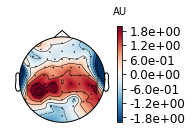

No baseline correction applied


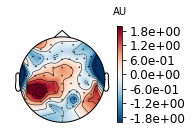

No baseline correction applied


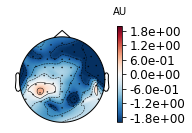

No baseline correction applied


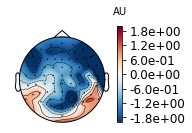




Plotting Alpha Band TARGET ON LEFT
Plotting Alpha band
No baseline correction applied


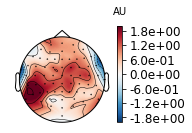

No baseline correction applied


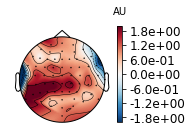

No baseline correction applied


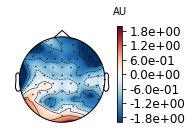

No baseline correction applied


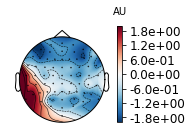

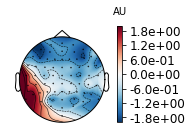

In [28]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=WBall_subs_Rights[cond]
center=WBall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band TARGET ON RIGHT')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)
#plt.show()#
print('\n\n\nPlotting Alpha Band TARGET ON LEFT')
## Contrasting with centrally presented:
lat=WBall_subs_Lefts[cond]
center=WBall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)
#plt.show()#

# Dis Long SOA, distractor on right and then distractor on left --WHITE BEAR SUBS

Plotting Alpha band DIS ON RIGHT
No baseline correction applied


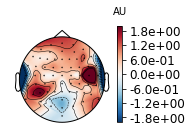

No baseline correction applied


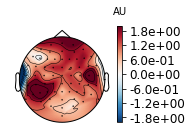

No baseline correction applied


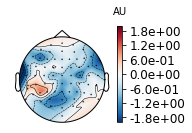

No baseline correction applied


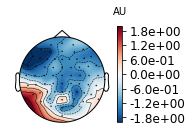




Plotting Alpha Band DIS ON LEFT
Plotting Alpha band
No baseline correction applied


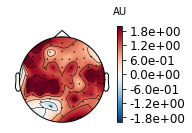

No baseline correction applied


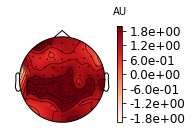

No baseline correction applied


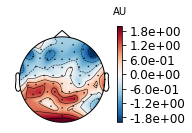

No baseline correction applied


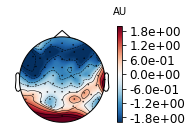

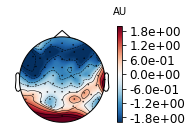

In [29]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=WBall_subs_Rights[cond]
center=WBall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band DIS ON RIGHT')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)
#plt.show()#
print('\n\n\nPlotting Alpha Band DIS ON LEFT')
## Contrasting with centrally presented:
lat=WBall_subs_Lefts[cond]
center=WBall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

### group avg for cue users (DISTRACTOR CUE USERS) (cue v neutral trials comparison)

In [30]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.
leftPost_elecs=['CP5','CP3','P7','P5','P3','PO3','PO7']
rightPost_elecs=['CP4','CP6','P4','P6','P8','PO4','PO8']
all_conds=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']
disCUall_subs_Lefts={}
disCUall_subs_Rights={}
disCUall_subs_Neutrals={}

for SubDict in [preprocCues_LeftH, preprocCues_RightH]:
    
    for cond in all_conds: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in cueUsers_dis_CvNcomp:
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(cueUsers_dis_CvNcomp)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        
        if SubDict==preprocCues_LeftH:
            disCUall_subs_Lefts[cond]=skeleton_obj
            print('Finished with left hemis for this cond')
        elif SubDict==preprocCues_RightH:
            disCUall_subs_Rights[cond]=skeleton_obj
            print('Finished with right hemis for this cond')

neuts=['neutLongCue_trig','neutShortCue_trig']
for SubDict in [preproc_cue_eps]:
    
    for cond in neuts: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in cueUsers_dis_CvNcomp:
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(cueUsers_dis_CvNcomp)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        

        disCUall_subs_Neutrals[cond]=skeleton_obj
        print('Finished with all subs epochs for this cond')

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


extracting sub 257, cond tarShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 257, cond disShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 257, cond tarLongCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 257, cond disLongCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 257, cond tarShortCue_trig
Applying baseline correction (mode: zscore)
Finished with right hemis for this cond
extracting sub 257, cond disShortCue_trig
Applying baseline correction (mode: zscore)
Finished with right hemis for this cond
extracting sub 257, cond tarLongCue_trig
Applying baseline correction (mode: zscore)
Finished with right hemis for this cond
extracting sub 257, cond disLongCue_trig
Applying baseline correction (mode: zscore)
Finished with right hemis for this cond


# Target Long SOA, target on right and then on left-- DISTRACTOR CUE USERS

Plotting Alpha band TARGET ON RIGHT
No baseline correction applied


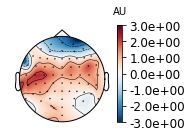

No baseline correction applied


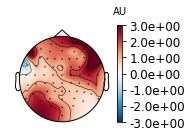

No baseline correction applied


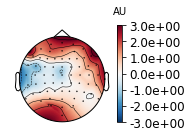

No baseline correction applied


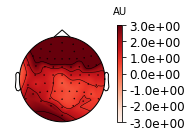




Plotting Alpha Band TARGET ON LEFT
Plotting Alpha band
No baseline correction applied


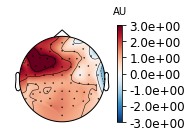

No baseline correction applied


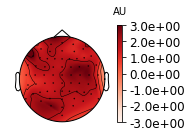

No baseline correction applied


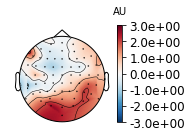

No baseline correction applied


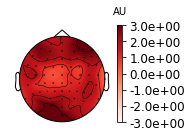

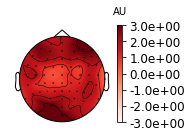

In [32]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=disCUall_subs_Rights[cond]
center=disCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band TARGET ON RIGHT')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-3,vmax=3)
#plt.show()#
print('\n\n\nPlotting Alpha Band TARGET ON LEFT')
## Contrasting with centrally presented:
lat=disCUall_subs_Lefts[cond]
center=disCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-3,vmax=3)
#plt.show()#

# Distractor Long SOA, distractor on right and then on the left-- DISTRACTOR CUE USERS

Plotting Alpha band DIS ON RIGHT
No baseline correction applied


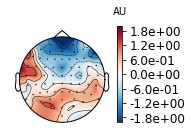

No baseline correction applied


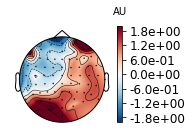

No baseline correction applied


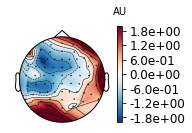

No baseline correction applied


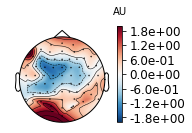




Plotting Alpha Band DIS ON LEFT
Plotting Alpha band
No baseline correction applied


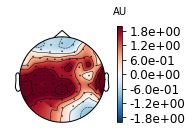

No baseline correction applied


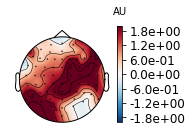

No baseline correction applied


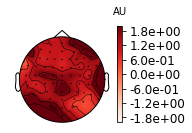

No baseline correction applied


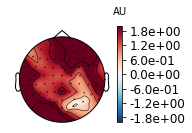

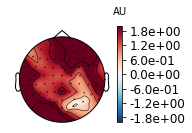

In [34]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=disCUall_subs_Rights[cond]
center=disCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band DIS ON RIGHT')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)
#plt.show()#
print('\n\n\nPlotting Alpha Band DIS ON LEFT')
## Contrasting with centrally presented:
lat=disCUall_subs_Lefts[cond]
center=disCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)

### group avg for target cue users, cue v neut trials

In [37]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.
leftPost_elecs=['CP5','CP3','P7','P5','P3','PO3','PO7']
rightPost_elecs=['CP4','CP6','P4','P6','P8','PO4','PO8']
all_conds=['tarShortCue_trig','disShortCue_trig',
           'tarLongCue_trig','disLongCue_trig']
tarCUall_subs_Lefts={}
tarCUall_subs_Rights={}
tarCUall_subs_Neutrals={}

for SubDict in [preprocCues_LeftH, preprocCues_RightH]:
    
    for cond in all_conds: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in cueUsers_target_CvNcomp:
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(cueUsers_target_CvNcomp)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        
        if SubDict==preprocCues_LeftH:
            tarCUall_subs_Lefts[cond]=skeleton_obj
            print('Finished with left hemis for this cond')
        elif SubDict==preprocCues_RightH:
            tarCUall_subs_Rights[cond]=skeleton_obj
            print('Finished with right hemis for this cond')

neuts=['neutLongCue_trig','neutShortCue_trig']
for SubDict in [preproc_cue_eps]:
    
    for cond in neuts: 
        # loading an example subject to steal the python object's structure
        # and overwrite the subject data with a group average
        skeleton_obj=mne.time_frequency.tfr_morlet(SubDict['249'][cond],freqs=freqs,n_cycles=n_cycles,
                                                   average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
        thisCond_allSubsDat=[]
        for s in cueUsers_target_CvNcomp:
            #print('\n\n\n')
            thisSub=SubDict[s][cond]
            print('extracting sub {0}, cond {1}'.format(s,cond))
            subDat=mne.time_frequency.tfr_morlet(thisSub,freqs=freqs,n_cycles=n_cycles,average=True,
                                                     use_fft=True,return_itc=False, decim=2, n_jobs=1)
            thisCond_allSubsDat.append(subDat.data)
            
        # compiling all subjects' data for this condition, in this hemisphere
        all_subs_thisCond=np.stack(thisCond_allSubsDat)
        # and averaging across the "subject" dimension
        assert all_subs_thisCond.shape[0] == len(cueUsers_target_CvNcomp)
        all_subs_thisCond=all_subs_thisCond.mean(axis=0)
        # then feeding that into the skeleton MNE averageTFR object
        skeleton_obj.data=all_subs_thisCond

        skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
        

        tarCUall_subs_Neutrals[cond]=skeleton_obj
        print('Finished with all subs epochs for this cond')

extracting sub 258, cond tarShortCue_trig
extracting sub 248, cond tarShortCue_trig
extracting sub 255, cond tarShortCue_trig
extracting sub 211, cond tarShortCue_trig
extracting sub 206, cond tarShortCue_trig
extracting sub 244, cond tarShortCue_trig
extracting sub 225, cond tarShortCue_trig
extracting sub 249, cond tarShortCue_trig
extracting sub 231, cond tarShortCue_trig
extracting sub 251, cond tarShortCue_trig
extracting sub 233, cond tarShortCue_trig
extracting sub 240, cond tarShortCue_trig
extracting sub 223, cond tarShortCue_trig
extracting sub 264, cond tarShortCue_trig
Applying baseline correction (mode: zscore)
Finished with left hemis for this cond
extracting sub 258, cond disShortCue_trig
extracting sub 248, cond disShortCue_trig
extracting sub 255, cond disShortCue_trig
extracting sub 211, cond disShortCue_trig
extracting sub 206, cond disShortCue_trig
extracting sub 244, cond disShortCue_trig
extracting sub 225, cond disShortCue_trig
extracting sub 249, cond disShortCu

# Target Long SOA, tar on right and then on left --- TARGET CUE USERS

Plotting Alpha band TARGET ON RIGHT
No baseline correction applied


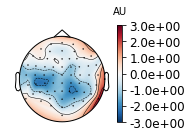

No baseline correction applied


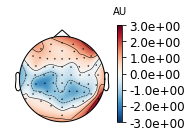

No baseline correction applied


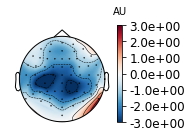

No baseline correction applied


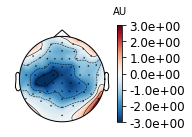




Plotting Alpha Band TARGET ON LEFT
Plotting Alpha band
No baseline correction applied


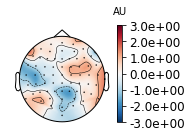

No baseline correction applied


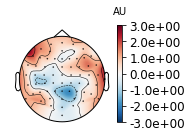

No baseline correction applied


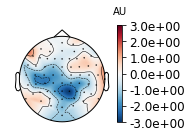

No baseline correction applied


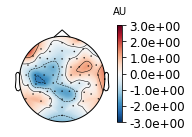

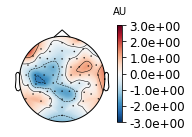

In [38]:
cond='tarLongCue_trig'
## Contrasting with centrally presented:
lat=tarCUall_subs_Rights[cond]
center=tarCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band TARGET ON RIGHT')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-3,vmax=3)
#plt.show()#
print('\n\n\nPlotting Alpha Band TARGET ON LEFT')
## Contrasting with centrally presented:
lat=tarCUall_subs_Lefts[cond]
center=tarCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-3,vmax=3)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-3,vmax=3)

# Dis Long SOA, on right and then left--- TARGET CUE USERS

Plotting Alpha band DIS ON RIGHT
No baseline correction applied


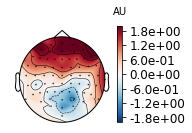

No baseline correction applied


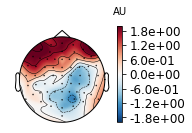

No baseline correction applied


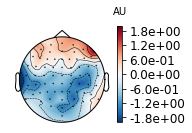

No baseline correction applied


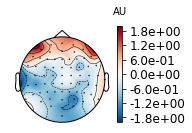




Plotting Alpha Band DIS ON LEFT
Plotting Alpha band
No baseline correction applied


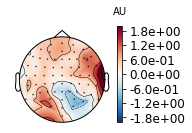

No baseline correction applied


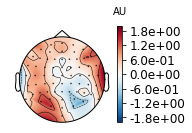

No baseline correction applied


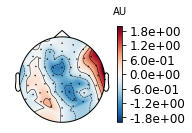

No baseline correction applied


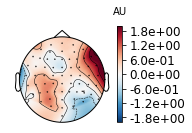

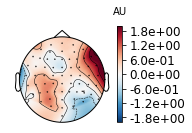

In [39]:
cond='disLongCue_trig'
## Contrasting with centrally presented:
lat=tarCUall_subs_Rights[cond]
center=tarCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band DIS ON RIGHT')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)
#plt.show()#
print('\n\n\nPlotting Alpha Band DIS ON LEFT')
## Contrasting with centrally presented:
lat=tarCUall_subs_Lefts[cond]
center=tarCUall_subs_Neutrals['neutLongCue_trig']
latMinusCenter=lat-center

print('Plotting Alpha band')
#fig,ax=plt.subplots(4)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0,tmax=0.2,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.2,tmax=0.4,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.4,tmax=0.8,vmin=-2,vmax=2)
latMinusCenter.plot_topomap(fmin=8,fmax=14,tmin=0.8,tmax=1,vmin=-2,vmax=2)